<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/PIPGES/01_ModelosdeRegulariza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EST5534 Aprendizado de Máquina Estatístico

## por Cibele Russo

## PIPGES

## Modelos de Regularização

In [31]:
import numpy as np
import matplotlib.pyplot as plt


In [32]:
import pandas as pd

# URL do arquivo Excel
# Dados antracose, de Morettin e Singer (2022)
url = "http://www.ime.usp.br/~jmsinger/MorettinSinger/antracose.xls"

# Carrega o arquivo Excel para um DataFrame
df = pd.read_excel(url)

# Exibe o dataframe
df.head(100)

,idade,tmunic,htransp,cargatabag,antracose,ses,densid,distmin
0,66,45.0,0.000000,0.00,0.122449,0.055969,0.014306,16.439944
1,25,25.0,1.000000,2.45,0.145299,-0.602858,0.012995,48.966927
2,61,61.0,0.666667,0.00,0.000000,0.665455,0.016083,61.168045
3,80,80.0,0.666667,15.00,0.208333,-0.740574,0.000000,725.505054
4,69,32.0,1.000000,40.00,0.408935,-0.610895,0.019650,5.886437
...,...,...,...,...,...,...,...,...
95,72,44.0,2.000000,0.00,NaN,-0.309629,0.019621,237.822991
96,57,28.0,0.333333,0.00,0.280000,-0.198001,0.023230,195.029454
97,80,60.0,3.000000,40.00,0.285024,-0.413502,0.017887,148.072065
98,83,60.0,1.000000,0.00,0.235632,0.301666,0.022087,130.507022


In [33]:
from sklearn.impute import SimpleImputer


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Supondo que você já carregou os dados em um DataFrame chamado 'df'

# Selecionando as variáveis preditoras e a variável resposta
X = df[['idade', 'tmunic', 'htransp', 'cargatabag', 'ses', 'densid', 'distmin']]
y = df['antracose']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Removendo linhas com dados faltantes
df_cleaned = df.dropna()

# Selecionando as variáveis preditoras e a variável resposta
X = df_cleaned[['idade', 'tmunic', 'htransp', 'cargatabag', 'ses', 'densid', 'distmin']]
y = df_cleaned['antracose']

# Dividindo os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:

# Modelo Linear sem regularização
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_preds = linear_model.predict(X_test)

# Modelo de regularização Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

# Modelo de regularização Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

# Modelo de regularização Elastic Net
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_preds = elastic_net_model.predict(X_test)


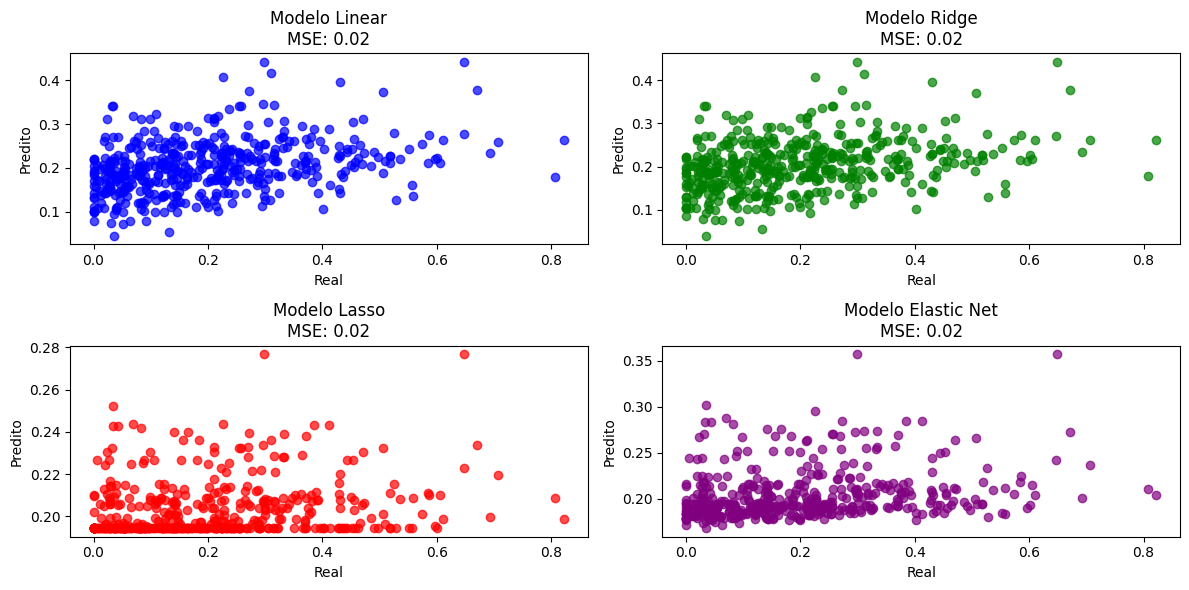

In [37]:
# Cálculo dos erros médios quadrados
mse_linear = mean_squared_error(y_test, linear_preds)
mse_ridge = mean_squared_error(y_test, ridge_preds)
mse_lasso = mean_squared_error(y_test, lasso_preds)
mse_elastic_net = mean_squared_error(y_test, elastic_net_preds)

# Visualização dos resultados
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.scatter(y_test, linear_preds, color='blue', alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(f'Modelo Linear\nMSE: {mse_linear:.2f}')

plt.subplot(2, 2, 2)
plt.scatter(y_test, ridge_preds, color='green', alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(f'Modelo Ridge\nMSE: {mse_ridge:.2f}')

plt.subplot(2, 2, 3)
plt.scatter(y_test, lasso_preds, color='red', alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(f'Modelo Lasso\nMSE: {mse_lasso:.2f}')

plt.subplot(2, 2, 4)
plt.scatter(y_test, elastic_net_preds, color='purple', alpha=0.7)
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(f'Modelo Elastic Net\nMSE: {mse_elastic_net:.2f}')

plt.tight_layout()
plt.show()